Importing all the libraries

In [2]:
import pandas as pd
import numpy as np
print("numpy and pandas imported")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
print("sklearn library imported")
from xgboost import XGBClassifier
print("xgboost imported")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print("tensorflow imported")

import shap
import lime
import lime.lime_tabular
print("shap and lime imported")

import matplotlib.pyplot as plt
import seaborn as sns
print("matplot and seaborn imported")

import warnings
warnings.filterwarnings("ignore")
print("warnings imported")

print("All libraries imported successfully!")
 

numpy and pandas imported
sklearn library imported
xgboost imported


2025-06-18 19:45:43.996218: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


tensorflow imported
shap and lime imported
matplot and seaborn imported
warnings imported
All libraries imported successfully!


Importing the dataset

In [3]:
df = pd.read_csv("Crop_recommendation.csv")

print("Dataset loaded. Shape:",df.shape)

df.head(10)

Dataset loaded. Shape: (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


Check for dataset input features and output labels

In [4]:
# Check the column names and data types
print(df.info())

# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Check how many unique crop labels are present
print("\nUnique crop types:\n", df['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Missing values in each column:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Unique crop types:
 label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana

Separation of features and labels and label encoding of the output label 

In [5]:
# Separate input features and target
X = df.drop("label", axis=1)
y = df["label"]

# Encode string labels into numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Print label -> number mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)


{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


Train-test data split (80:20)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)


XGBClassifier Model training

In [7]:
from xgboost import XGBClassifier

# Initialize the classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


XGBClassification report 

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 98.64%

Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      0.96      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      

SHAP Setup for XGBoost using tree explainer 

 99%|===================| 9624/9680 [01:22<00:00]        

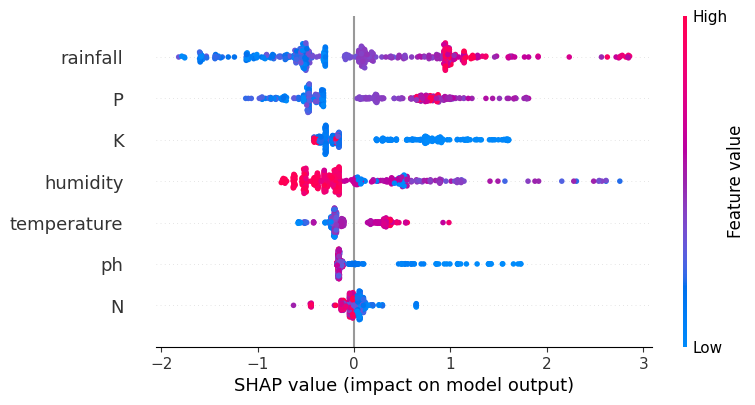

In [34]:
import shap

# Step 1: Initialize SHAP JS for better plots in notebook (optional)
shap.initjs()

# Step 2: Create a unified SHAP Explainer (auto-detects it's a tree model)
explainer = shap.Explainer(model, X_train)

# Step 3: Calculate SHAP values for the test set
shap_values = explainer(X_test)  # returns shap.Explanation object



# Show SHAP summary plot for class 18 (pigeonpeas)
shap.plots.beeswarm(shap_values[:, :, 18])



XGB force plot using SHAP libary

In [41]:
import shap
import numpy as np
import pandas as pd


shap.initjs()

# SHAP explainer for tree models (multiclass XGBoost)
explainer = shap.Explainer(model, X_train)  # unified SHAP interface

# Model predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Convert to Series for label comparison
true_label = pd.Series(y_test).reset_index(drop=True)
pred_label = pd.Series(y_pred).reset_index(drop=True)

# Find all misclassified samples
misclassified = true_label != pred_label
misclassified_df = pd.DataFrame({
    'True': true_label[misclassified],
    'Predicted': pred_label[misclassified]
}).reset_index()

# Print misclassified samples and class indices
print(misclassified_df)
class_names = model.classes_
print(list(enumerate(class_names)))

# Select one misclassified index manually (based on above)
selected_idx = 65  # can change to whichever misclassification you want to force plot 

# Get the instance (as a DataFrame row)
instance = X_test.iloc[[selected_idx]]

# Get SHAP values using unified interface
shap_values_instance = explainer(instance)

# Get integer class indices for true and predicted labels
true_class_index = list(class_names).index(true_label[selected_idx])
pred_class_index = list(class_names).index(pred_label[selected_idx])

shap.force_plot(shap_values_instance[:, :, pred_class_index])

shap.force_plot(shap_values_instance[:, :, true_class_index])

#Here the red arrows forced towards the misclassification while the blue one opposed misclassification


   index  True  Predicted
0     65    18          2
1    246    18         12
2    274    11          6
3    279    20          8
4    369     8         20
5    420    13         10
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21)]


XGB explain instance using LIME and multiclass summary plot using SHAP 

ExactExplainer explainer: 441it [01:04,  6.87it/s]                         


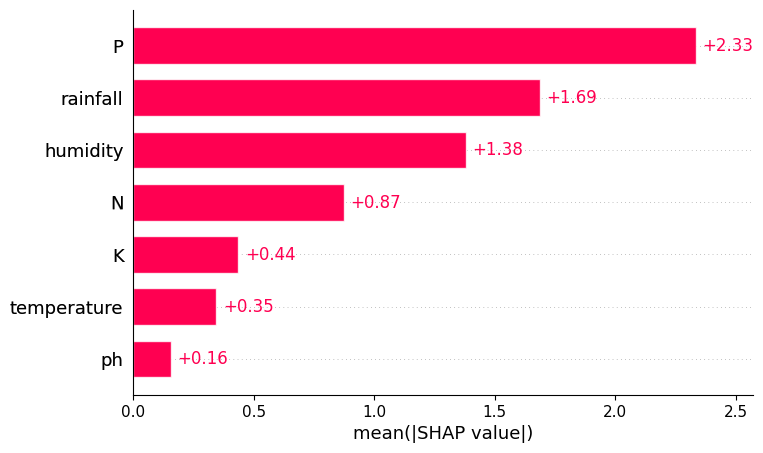

In [45]:
#LIME 
from lime.lime_tabular import LimeTabularExplainer
from IPython.core.display import HTML

# Prepare data for LIME
X_train_np = X_train.values
X_test_np = X_test.values
feature_names = X_train.columns.tolist()
class_names = model.classes_.tolist()

# Initialize LIME Tabular Explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

# Select a misclassified instance by index
selected_idx = 65
instance_np = X_test_np[selected_idx]

# Generate LIME explanation
lime_exp = lime_explainer.explain_instance(
    data_row=instance_np,
    predict_fn=model.predict_proba,
    num_features=7
)

# Show LIME explanation in notebook
HTML(lime_exp.as_html())

# Save LIME explanation as HTML
lime_exp.save_to_file('lime_explanation.html')



# SHAP summary plot 
import shap

# Use SHAP's unified Explainer API for XGBoost
explainer = shap.Explainer(model.predict, X_train, feature_names=X_train.columns)


# Compute SHAP values on the test set
shap_values = explainer(X_test)

# Display the SHAP summary bar plot (shows average impact per class)
shap.plots.bar(shap_values)


Setup SVM Linear Classifier

In [9]:
from sklearn.svm import SVC

# Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Train the SVM Model 

In [10]:
from sklearn.svm import SVC

# Initialize Linear SVM
svm_linear = SVC(kernel='linear')

# Train on training data
svm_linear.fit(X_train, y_train)

print("SVM (Linear kernel) model training complete.")


SVM (Linear kernel) model training complete.


Evaluate test results, accuracy and other metrics 

In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred_svm_linear = svm_linear.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_svm_linear)
print(f"Accuracy (SVM - Linear): {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report (SVM - Linear):\n")
print(classification_report(y_test, y_pred_svm_linear, target_names=le.classes_))


Accuracy (SVM - Linear): 97.95%

Classification Report (SVM - Linear):

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.87      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      ora

Training of the SVM polynomial implementation 

In [12]:
from sklearn.svm import SVC

# Initialize Polynomial Kernel SVM (default degree = 3)
svm_poly = SVC(kernel='poly')

# Train the model
svm_poly.fit(X_train, y_train)

print("SVM (Polynomial kernel) model training complete.")


SVM (Polynomial kernel) model training complete.


SVM Polynomial model test results , evaluation and other metrics 


In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred_svm_poly = svm_poly.predict(X_test)

# Accuracy
accuracy_poly = accuracy_score(y_test, y_pred_svm_poly)
print(f"Accuracy (SVM - Polynomial): {accuracy_poly * 100:.2f}%")

# Classification report
print("\nClassification Report (SVM - Polynomial):\n")
print(classification_report(y_test, y_pred_svm_poly, target_names=le.classes_))


Accuracy (SVM - Polynomial): 98.18%

Classification Report (SVM - Polynomial):

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.96      0.90        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
 

SVM with RBF (radial basis function) kernel training 

In [14]:
from sklearn.svm import SVC

# Initialize RBF kernel SVM (RBF is default kernel)
svm_rbf = SVC(kernel='rbf')

# Train the model
svm_rbf.fit(X_train, y_train)

print("SVM (RBF kernel) model training complete.")


SVM (RBF kernel) model training complete.


SVM RBF model test results, evaluation and other metrics

In [15]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred_svm_rbf = svm_rbf.predict(X_test)

# Accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_svm_rbf)
print(f"Accuracy (SVM - RBF): {accuracy_rbf * 100:.2f}%")

# Classification Report
print("\nClassification Report (SVM - RBF):\n")
print(classification_report(y_test, y_pred_svm_rbf, target_names=le.classes_))


Accuracy (SVM - RBF): 96.14%

Classification Report (SVM - RBF):

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.85      1.00      0.92        17
      grapes       1.00      1.00      1.00        14
        jute       0.77      1.00      0.87        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.86      0.92        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange   

MLP neural network training 

In [16]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoded format
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the model
mlp_model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')  # Output layer for 22 crops
])

# Compile the model
mlp_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
mlp_model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, verbose=1)

print("MLP model training complete.")


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1248 - loss: 14.7735
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6503 - loss: 1.1189
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8977 - loss: 0.3864
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9188 - loss: 0.2617
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9290 - loss: 0.2255
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9261 - loss: 0.1940
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9463 - loss: 0.1714
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9387 - loss: 0.1611
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9450 - loss: 0.1552
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9590 - loss: 0.1242
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9643 - loss: 0.1117
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9512 - l

MLP neutral network model accuracy and other metrics evaluation results

In [17]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Predict class probabilities on test set
y_pred_probs = mlp_model.predict(X_test)

# Convert probabilities to class labels (by taking the argmax index)
y_pred_mlp = np.argmax(y_pred_probs, axis=1)

# Accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy (MLP): {accuracy_mlp * 100:.2f}%")

# Classification report
print("\nClassification Report (MLP):\n")
print(classification_report(y_test, y_pred_mlp, target_names=le.classes_))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy (MLP): 92.50%

Classification Report (MLP):

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.75      0.90      0.82        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.81      1.00      0.89        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.43      0.57        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.71      0.83        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.90      0.75      0.82        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.